In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning) 
warnings.simplefilter("ignore", category=UserWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

njobs = -1

In [2]:
train=pd.read_csv('train.csv',sep='|')
test=pd.read_csv('test.csv',sep='|')

In [3]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


# Feature Engineering

derviable directly from given features

In [4]:
train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = test['scansWithoutRegistration'] / test['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = test['quantityModifications'] / test['totalScanTimeInSeconds']
test['secondsPerEuro'] = test['totalScanTimeInSeconds'] / test['grandTotal']
test['lineItemVoidsPerEuro'] = test['lineItemVoids'] / test['grandTotal']
test['scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / test['grandTotal']
test['quantityModificationsPerEuro'] = test['quantityModifications'] / test['grandTotal']

In [5]:
test.loc[test['grandTotal'] == 0.00, 'secondsPerEuro'] = test['totalScanTimeInSeconds'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = test['lineItemVoids'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = test['quantityModifications'] / 0.01

derivable from PCA / tSNE Analysis

In [6]:
test['fraud'] = -1

In [7]:
train_test_combined = pd.concat([train, test], ignore_index=True)

In [8]:
X_train_test_combined = train_test_combined.drop('fraud',axis=1)
Y_train_test_combined = train_test_combined['fraud']
print(X_train_test_combined.shape, Y_train_test_combined.shape)

(500000, 20) (500000,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer 

feature_scaler = MinMaxScaler()
X_train_test_combined = pd.DataFrame(feature_scaler.fit_transform(X_train_test_combined.values), columns=X_train_test_combined.columns, index=X_train_test_combined.index)

#feature_scaler = StandardScaler()
#X = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
#data_preparation = "StandardScaler"

#transformer = FunctionTransformer(np.log1p, validate=True)
#X_scaled = pd.DataFrame(transformer.transform(X), columns=X.columns, index=X.index)
#data_preparation = "LogScaler"

derive features from PCA

In [10]:
from sklearn.decomposition import PCA

X_train_test_combined_PCA = X_train_test_combined.copy()

pca = PCA(n_components=7)
pca_result = pca.fit_transform(X_train_test_combined_PCA)

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 7 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.16124041 0.1559011  0.14737624 0.13509126 0.13197732 0.11312753
 0.11161208]
Cumulative explained variation for 7 principal components: 0.9563259397521086


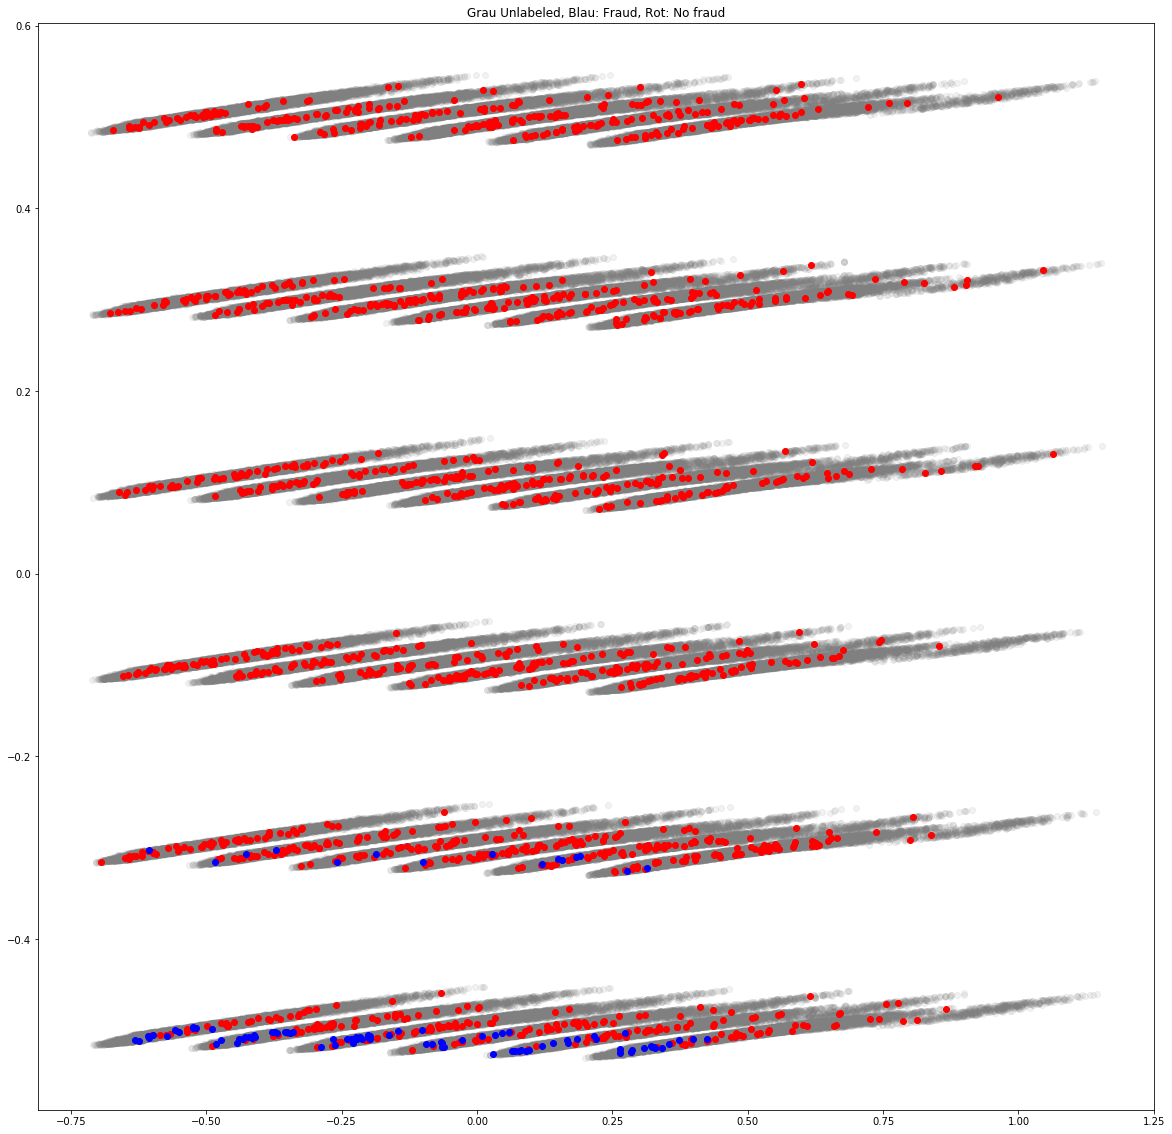

In [11]:
plt.rcParams['figure.figsize'] = (20,20)

plt.title('Grau Unlabeled, Blau: Fraud, Rot: No fraud')

plt.scatter(X_train_test_combined_PCA["pca-one"][Y_train_test_combined == -1].values, X_train_test_combined_PCA["pca-two"][Y_train_test_combined == -1].values, color='grey', alpha = 0.1)
plt.scatter(X_train_test_combined_PCA["pca-one"][Y_train_test_combined == 0], X_train_test_combined_PCA["pca-two"][Y_train_test_combined == 0], color='r')
plt.scatter(X_train_test_combined_PCA["pca-one"][Y_train_test_combined == 1], X_train_test_combined_PCA["pca-two"][Y_train_test_combined == 1], color='b')
plt.show()

Add PCA axes as additional features

In [140]:
train['pca_axis_1'] = X_train_test_combined_PCA['pca-one'].head(len(train))
train['pca_axis_2'] = X_train_test_combined_PCA['pca-two'].head(len(train))

test['pca_axis_1'] = X_train_test_combined_PCA['pca-one'].tail(len(test)).reset_index(drop = True)
test['pca_axis_2'] = X_train_test_combined_PCA['pca-two'].tail(len(test)).reset_index(drop = True)

In [141]:
test

trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  valuePerSecond  lineItemVoidsPerPosition  scannedLineItems  pricePerScannedLineItem  scansWithoutRegistrationPerScannedLineItem  quantityModificationsPerScannedLineItem  lineItemVoidsPerSecond  scansWithoutRegistrationPerSecond  quantityModificationsPerSecond  secondsPerEuro  lineItemVoidsPerEuro  scansWithoutRegistrationPerEuro  quantityModificationsPerEuro  fraud  pca_axis_1  pca_axis_2
0                4                     467       88.48              4                         8                      4                   0.014989        0.189465                  0.571429               7.0                12.640000                                    1.142857                                 0.571429                0.008565                           0.017131                        0.008565        5.278029              0.045208                         0.090416                      0.045208     -1    0.407059    0.107610
1                3                    1004       58.99              7                         6                      1                   0.026892        0.058755                  0.259259              27.0                 2.184815                                    0.222222                                 0.037037                0.006972                           0.005976                        0.000996       17.019834              0.118664                         0.101712                      0.016952     -1   -0.404056   -0.107318
2                1                     162       14.00              4                         5                      4                   0.006173        0.086420                  4.000000               1.0                14.000000                                    5.000000                                 4.000000                0.024691                           0.030864                        0.024691       11.571429              0.285714                         0.357143                      0.285714     -1    0.648069   -0.481068
3                5                     532       84.79              9                         3                      4                   0.026316        0.159380                  0.642857              14.0                 6.056429                                    0.214286                                 0.285714                0.016917                           0.005639                        0.007519        6.274325              0.106145                         0.035382                      0.047175     -1    0.292492    0.294786
4                5                     890       42.16              4                         0                      0                   0.021348        0.047371                  0.210526              19.0                 2.218947                                    0.000000                                 0.000000                0.004494                           0.000000                        0.000000       21.110057              0.094877                         0.000000                      0.000000     -1   -0.564485    0.295128
5                5                    1072       12.67              3                         4                      1                   0.019590        0.011819                  0.142857              21.0                 0.603333                                    0.190476                                 0.047619                0.002799                           0.003731                        0.000933       84.609313              0.236780                         0.315706                      0.078927     -1   -0.388592    0.294494
6                3                     259       93.75              0                         7                      0                   0.100386        0.361969                  0.000000              26.0                 3.605769     

In [134]:
X_train_test_combined_PCA['pca-one'].head(len(train))

0      -0.106133
1       0.243599
2       0.502515
3       0.122039
4      -0.226498
5      -0.212661
6      -0.241190
7       0.310786
8      -0.263363
9       0.124496
10      0.233174
11     -0.559074
12      0.341915
13      0.115134
14      0.146390
15      0.523572
16     -0.487422
17      0.209145
18      0.655149
19      0.024886
20     -0.147514
21     -0.374239
22     -0.027412
23     -0.208295
24      0.670285
25     -0.172485
26     -0.444936
27      0.380667
28      0.195869
29      0.024610
30     -0.415938
31     -0.281004
32     -0.188589
33      0.310911
34     -0.072099
35      0.587562
36      0.124534
37      0.189563
38     -0.121108
39     -0.048389
40      0.169719
41      0.394520
42     -0.134055
43      0.342952
44     -0.439790
45      0.143815
46     -0.553871
47      0.010419
48     -0.331832
49      0.283808
50      0.827401
51     -0.297974
52     -0.014921
53      0.140689
54     -0.554367
55      0.145108
56      0.384590
57      0.461378
58     -0.4906

derive features from tSNE -> computation takes a long time -> use the precomputed value three cells below

In [13]:
X_train_test_combined_tSNE = X_train_test_combined.copy()

In [161]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, init = 'pca')
tsne_results = tsne.fit_transform(X_train_test_combined_tSNE)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500000 samples in 3.783s...
[t-SNE] Computed neighbors for 500000 samples in 470.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 500000
[t-SNE] Computed conditional probabilities for sample 2000 / 500000
[t-SNE] Computed conditional probabilities for sample 3000 / 500000
[t-SNE] Computed conditional probabilities for sample 4000 / 500000
[t-SNE] Computed conditional probabilities for sample 5000 / 500000
[t-SNE] Computed conditional probabilities for sample 6000 / 500000
[t-SNE] Computed conditional probabilities for sample 7000 / 500000
[t-SNE] Computed conditional probabilities for sample 8000 / 500000
[t-SNE] Computed conditional probabilities for sample 9000 / 500000
[t-SNE] Computed conditional probabilities for sample 10000 / 500000
[t-SNE] Computed conditional probabilities for sample 11000 / 500000
[t-SNE] Computed conditional probabilities for sample 12000 / 500000
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 134000 / 500000
[t-SNE] Computed conditional probabilities for sample 135000 / 500000
[t-SNE] Computed conditional probabilities for sample 136000 / 500000
[t-SNE] Computed conditional probabilities for sample 137000 / 500000
[t-SNE] Computed conditional probabilities for sample 138000 / 500000
[t-SNE] Computed conditional probabilities for sample 139000 / 500000
[t-SNE] Computed conditional probabilities for sample 140000 / 500000
[t-SNE] Computed conditional probabilities for sample 141000 / 500000
[t-SNE] Computed conditional probabilities for sample 142000 / 500000
[t-SNE] Computed conditional probabilities for sample 143000 / 500000
[t-SNE] Computed conditional probabilities for sample 144000 / 500000
[t-SNE] Computed conditional probabilities for sample 145000 / 500000
[t-SNE] Computed conditional probabilities for sample 146000 / 500000
[t-SNE] Computed conditional probabilities for sample 147000 / 500000
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 262000 / 500000
[t-SNE] Computed conditional probabilities for sample 263000 / 500000
[t-SNE] Computed conditional probabilities for sample 264000 / 500000
[t-SNE] Computed conditional probabilities for sample 265000 / 500000
[t-SNE] Computed conditional probabilities for sample 266000 / 500000
[t-SNE] Computed conditional probabilities for sample 267000 / 500000
[t-SNE] Computed conditional probabilities for sample 268000 / 500000
[t-SNE] Computed conditional probabilities for sample 269000 / 500000
[t-SNE] Computed conditional probabilities for sample 270000 / 500000
[t-SNE] Computed conditional probabilities for sample 271000 / 500000
[t-SNE] Computed conditional probabilities for sample 272000 / 500000
[t-SNE] Computed conditional probabilities for sample 273000 / 500000
[t-SNE] Computed conditional probabilities for sample 274000 / 500000
[t-SNE] Computed conditional probabilities for sample 275000 / 500000
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 388000 / 500000
[t-SNE] Computed conditional probabilities for sample 389000 / 500000
[t-SNE] Computed conditional probabilities for sample 390000 / 500000
[t-SNE] Computed conditional probabilities for sample 391000 / 500000
[t-SNE] Computed conditional probabilities for sample 392000 / 500000
[t-SNE] Computed conditional probabilities for sample 393000 / 500000
[t-SNE] Computed conditional probabilities for sample 394000 / 500000
[t-SNE] Computed conditional probabilities for sample 395000 / 500000
[t-SNE] Computed conditional probabilities for sample 396000 / 500000
[t-SNE] Computed conditional probabilities for sample 397000 / 500000
[t-SNE] Computed conditional probabilities for sample 398000 / 500000
[t-SNE] Computed conditional probabilities for sample 399000 / 500000
[t-SNE] Computed conditional probabilities for sample 400000 / 500000
[t-SNE] Computed conditional probabilities for sample 401000 / 500000
[t-SNE] Computed con

In [14]:
# tsne_results_df = pd.DataFrame(tsne_results)
# tsne_results_df.to_pickle("tsneResult.pkl")
tsne_results = pd.read_pickle("tsneResult.pkl").values

In [15]:
X_train_test_combined_tSNE['tsne-one'] = tsne_results[:,0]
X_train_test_combined_tSNE['tsne-two'] = tsne_results[:,1]

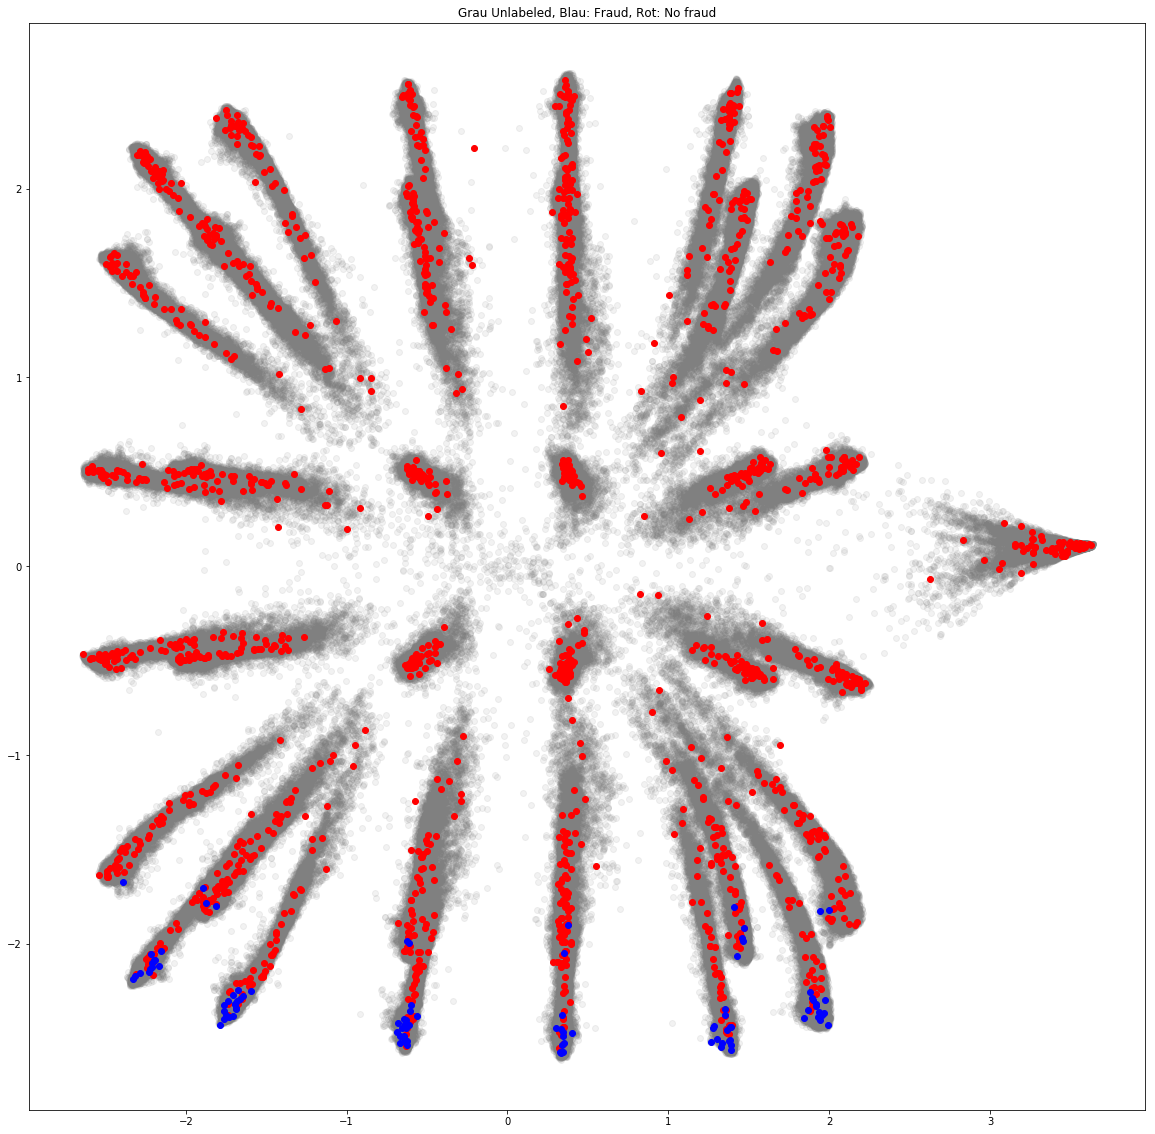

In [16]:
plt.rcParams['figure.figsize'] = (20,20)

plt.title('Grau Unlabeled, Blau: Fraud, Rot: No fraud')

plt.scatter(X_train_test_combined_tSNE["tsne-one"][Y_train_test_combined == -1].values, X_train_test_combined_tSNE["tsne-two"][Y_train_test_combined == -1].values, color='grey', alpha = 0.1)
plt.scatter(X_train_test_combined_tSNE["tsne-one"][Y_train_test_combined == 0], X_train_test_combined_tSNE["tsne-two"][Y_train_test_combined == 0], color='r')
plt.scatter(X_train_test_combined_tSNE["tsne-one"][Y_train_test_combined == 1], X_train_test_combined_tSNE["tsne-two"][Y_train_test_combined == 1], color='b')
plt.show()

In [151]:
train['tsne_axis_1'] = X_train_test_combined_tSNE['tsne-one'].head(len(train))
train['tsne_axis_2'] = X_train_test_combined_tSNE['tsne-two'].head(len(train))

test['tsne_axis_1'] = X_train_test_combined_tSNE['tsne-one'].tail(len(test)).reset_index(drop = True)
test['tsne_axis_2'] = X_train_test_combined_tSNE['tsne-two'].tail(len(test)).reset_index(drop = True)

Find out center of clusters -> *this doesnt apply to the current solution yet -> dont run it*

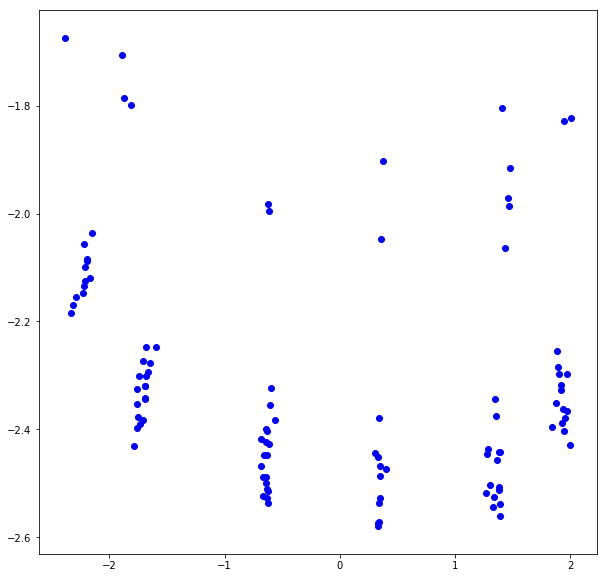

In [415]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(train['tsne_axis_1'][train['fraud'] == 1], train['tsne_axis_2'][train['fraud'] == 1], color='blue')

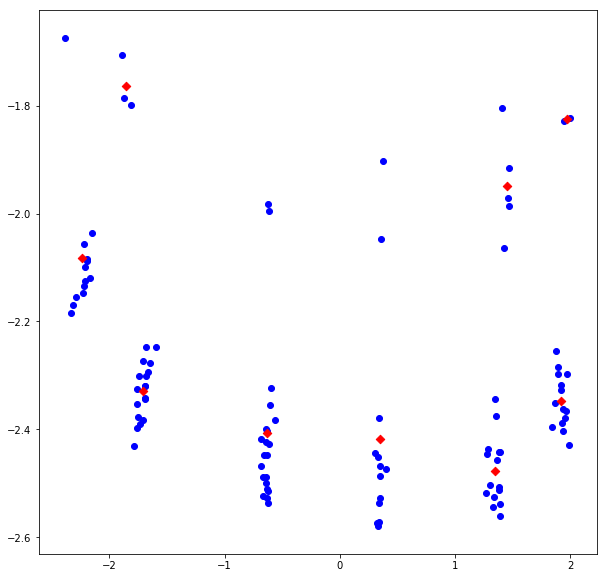

In [416]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 9)

combined_data = pd.DataFrame(train['tsne_axis_1'][train['fraud'] == 1])
combined_data['tsne_axis_2'] = train['tsne_axis_2'][train['fraud'] == 1]

kmeans.fit_predict(combined_data)

plt.scatter(train['tsne_axis_1'][train['fraud'] == 1], train['tsne_axis_2'][train['fraud'] == 1], color='blue')

cluster_centers = kmeans.cluster_centers_

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='red', marker = "D")

Distance to cluster centers as additional features

In [417]:
def dist(points1, points2):
    result = []
    for i in range(0, len(points1)):
        result.append(np.sqrt( (points1['tsne_axis_1'][i] - points2['tsne_axis_1'][i])**2
                              +(points1['tsne_axis_2'][i] - points2['tsne_axis_2'][i])**2))
    return(result)

In [418]:
coordinates = pd.DataFrame(
            {'tsne_axis_1': train['tsne_axis_1'],
             'tsne_axis_2': train['tsne_axis_2'],
            })
coordinates['tsne_axis_1']

cluster_center_1 = pd.DataFrame([cluster_centers[0]] * len(train))
cluster_center_2 = pd.DataFrame([cluster_centers[1]] * len(train))
cluster_center_3 = pd.DataFrame([cluster_centers[2]] * len(train))
cluster_center_4 = pd.DataFrame([cluster_centers[0]] * len(train))
cluster_center_5 = pd.DataFrame([cluster_centers[1]] * len(train))
cluster_center_6 = pd.DataFrame([cluster_centers[2]] * len(train))
cluster_center_7 = pd.DataFrame([cluster_centers[0]] * len(train))
cluster_center_8 = pd.DataFrame([cluster_centers[1]] * len(train))
cluster_center_9 = pd.DataFrame([cluster_centers[2]] * len(train))

cluster_center_1.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_2.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_3.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_4.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_5.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_6.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_7.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_8.columns = ['tsne_axis_1', 'tsne_axis_2']
cluster_center_9.columns = ['tsne_axis_1', 'tsne_axis_2']

# don't use distance to cluster centers because it 'does not preserve distances nor density' (https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne)

#train['distance_cluster_center_1'] = dist(cluster_center_1, coordinates)
#train['distance_cluster_center_2'] = dist(cluster_center_2, coordinates)
#train['distance_cluster_center_3'] = dist(cluster_center_3, coordinates)
#train['distance_cluster_center_4'] = dist(cluster_center_4, coordinates)
#train['distance_cluster_center_5'] = dist(cluster_center_5, coordinates)
#train['distance_cluster_center_6'] = dist(cluster_center_6, coordinates)
#train['distance_cluster_center_7'] = dist(cluster_center_7, coordinates)
#train['distance_cluster_center_8'] = dist(cluster_center_8, coordinates)
#train['distance_cluster_center_9'] = dist(cluster_center_9, coordinates)

Remove the fraud label from the test data again

In [147]:
test = test.drop('fraud',axis=1)

In [152]:
test

trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  valuePerSecond  lineItemVoidsPerPosition  scannedLineItems  pricePerScannedLineItem  scansWithoutRegistrationPerScannedLineItem  quantityModificationsPerScannedLineItem  lineItemVoidsPerSecond  scansWithoutRegistrationPerSecond  quantityModificationsPerSecond  secondsPerEuro  lineItemVoidsPerEuro  scansWithoutRegistrationPerEuro  quantityModificationsPerEuro  pca_axis_1  pca_axis_2  tsne_axis_1  tsne_axis_2
0                4                     467       88.48              4                         8                      4                   0.014989        0.189465                  0.571429               7.0                12.640000                                    1.142857                                 0.571429                0.008565                           0.017131                        0.008565        5.278029              0.045208                         0.090416                      0.045208    0.407059    0.107610     1.288056     0.439125
1                3                    1004       58.99              7                         6                      1                   0.026892        0.058755                  0.259259              27.0                 2.184815                                    0.222222                                 0.037037                0.006972                           0.005976                        0.000996       17.019834              0.118664                         0.101712                      0.016952   -0.404056   -0.107318    -2.048066    -0.496164
2                1                     162       14.00              4                         5                      4                   0.006173        0.086420                  4.000000               1.0                14.000000                                    5.000000                                 4.000000                0.024691                           0.030864                        0.024691       11.571429              0.285714                         0.357143                      0.285714    0.648069   -0.481068     3.447044     0.053117
3                5                     532       84.79              9                         3                      4                   0.026316        0.159380                  0.642857              14.0                 6.056429                                    0.214286                                 0.285714                0.016917                           0.005639                        0.007519        6.274325              0.106145                         0.035382                      0.047175    0.292492    0.294786     1.344228     1.554838
4                5                     890       42.16              4                         0                      0                   0.021348        0.047371                  0.210526              19.0                 2.218947                                    0.000000                                 0.000000                0.004494                           0.000000                        0.000000       21.110057              0.094877                         0.000000                      0.000000   -0.564485    0.295128    -2.414502     1.547169
5                5                    1072       12.67              3                         4                      1                   0.019590        0.011819                  0.142857              21.0                 0.603333                                    0.190476                                 0.047619                0.002799                           0.003731                        0.000933       84.609313              0.236780                         0.315706                      0.078927   -0.388592    0.294494    -1.828019     1.732591
6                3                     259       93.75              0                         7       

# Feature Importance Analysis

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

y = train['fraud']
x = train.drop('fraud',axis=1)

# feature extraction
model = ExtraTreesClassifier(criterion = 'entropy')
model.fit(x, y)

pd.DataFrame(model.feature_importances_, list(x), columns =['Importance']).sort_values(by='Importance', ascending = False)

Importance
trustLevel                                    0.188764
scannedLineItems                              0.168201
pca_axis_2                                    0.139404
tsne_axis_2                                   0.136704
totalScanTimeInSeconds                        0.045290
scansWithoutRegistration                      0.033575
scannedLineItemsPerSecond                     0.025700
scansWithoutRegistrationPerScannedLineItem    0.022806
pca_axis_1                                    0.022094
lineItemVoids                                 0.021141
quantityModificationsPerScannedLineItem       0.020317
lineItemVoidsPerSecond                        0.018309
pricePerScannedLineItem                       0.018269
quantityModificationsPerSecond                0.014795
lineItemVoidsPerPosition                      0.014629
scansWithoutRegistrationPerSecond             0.014535
valuePerSecond                                0.014130
secondsPerEuro                                0.013679
quantityModifications                         0.012447
lineItemVoidsPerEuro                          0.012074
tsne_axis_1                                   0.011832
grandTotal                                    0.011696
scansWithoutRegistrationPerEuro               0.011393
quantityModificationsPerEuro                  0.008216

# Applying oversampling to dataset -> works but we will probably won't use it
- Classical Oversampling
- SMOTE Technique
- ADASYN Technique

Each one has a slightly different approach for generating synthetic instances
- Simply duplicated fraud instances
- ADASYN focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier
- SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule.


In [66]:
# !pip install imblearn  # might be necessary for installation
from imblearn.over_sampling import RandomOverSampler

def randomOverSampling(train):
    ros = RandomOverSampler(random_state=42, ratio = 1)
    X_train_extended, Y_train_extended = ros.fit_resample(train.drop('fraud',axis=1), train['fraud'])

    new_train = pd.DataFrame(X_train_extended, columns=train.drop('fraud',axis=1).columns) 
    new_train["fraud"] = Y_train_extended
    return new_train

print(randomOverSampling(train).fraud.value_counts())
print(randomOverSampling(train).fraud.value_counts() / len(randomOverSampling(train)))

1    1775
0    1775
Name: fraud, dtype: int64
1    0.5
0    0.5
Name: fraud, dtype: float64


In [67]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

def smoteOverSamling(train):
    sm = SMOTE(random_state=42, k_neighbors = 3, ratio = 1)
    X_train_extended, Y_train_extended = sm.fit_sample(train.drop('fraud',axis=1), train['fraud'])

    new_train = pd.DataFrame(X_train_extended, columns=train.drop('fraud',axis=1).columns) 
    new_train ["fraud"] = Y_train_extended
    return new_train
    
print(smoteOverSamling(train).fraud.value_counts())
print(smoteOverSamling(train).fraud.value_counts() / len(smoteOverSamling(train)))

1    1775
0    1775
Name: fraud, dtype: int64
1    0.5
0    0.5
Name: fraud, dtype: float64


In [69]:
from imblearn.over_sampling import ADASYN

def adasynOverSamling(train):
    ada = ADASYN(random_state=42, n_neighbors = 3, ratio = 1)
    X_train_extended, Y_train_extended = ada.fit_resample(train.drop('fraud',axis=1), train['fraud'])

    new_train = pd.DataFrame(X_train_extended, columns=train.drop('fraud',axis=1).columns) 
    new_train["fraud"] = Y_train_extended
    return new_train
    
print(adasynOverSamling(train).fraud.value_counts())
print(adasynOverSamling(train).fraud.value_counts() / len(adasynOverSamling(train)))

1    1820
0    1775
Name: fraud, dtype: int64
1    0.506259
0    0.493741
Name: fraud, dtype: float64


# Actually apply one of these techniques

In [ ]:
# train = smoteOverSamling(train)

# Defining the Custom Score Function based on the given cost matrix

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

# Building model factory

In [70]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble.voting_classifier import VotingClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from sklearn.mixture import DPGMM
#from sklearn.mixture import GMM
#from sklearn.mixture import GaussianMixture
#from sklearn.mixture import VBGMM

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



model_tuning_factory = [   
    GridSearchCV(LogisticRegression(max_iter = 10000), 
             dict(# penalty = ['l1','l2'],  # automatic regularization  -> option 'l1' doesnt work with all solvers and leads to errors
                     solver = ['newton-cg', 'lbfgs', 'liblinear'], 
                     fit_intercept = [True, False],
                     C = np.arange(0.1, 2.0, 0.1)),
             cv = skf,
             scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(KNeighborsClassifier(), 
                 dict(
                     n_neighbors = [1, 3, 5, 10, 15],
                     weights = ['uniform', 'distance'],
                     p = [1, 2, 3]
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(DecisionTreeClassifier(),
                 dict(criterion = ['entropy', 'gini'],
                      splitter = ['best', 'random'],
                      max_depth = range(1,50,2),
                      min_samples_split = range(2,10,2)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(ExtraTreeClassifier(),
                 dict(criterion = ['entropy', 'gini'],
                      splitter = ['best', 'random'],
                      max_depth = range(1,50,2),
                      min_samples_split = range(2,10,2)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(ExtraTreesClassifier(),
                 dict(n_estimators = range(5,200,5),
                      criterion = ['entropy', 'gini']),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),    
    GridSearchCV(RandomForestClassifier(),
                 dict(n_estimators = range(5,200,5),
                      criterion = ['entropy', 'gini']),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),    
 #   GridSearchCV(BernoulliNB(),
 #                dict(binarize  = np.arange(0.0, 2.0, 0.1)),
 #                cv = skf,
 #                scoring = my_custom_score), 
 #   GridSearchCV(GaussianNB(),
 #                dict(),
 #                cv = skf,
 #                scoring = my_custom_score), 
    GridSearchCV(GradientBoostingClassifier(),
                 dict(loss = ['deviance', 'exponential'],
                      n_estimators = [20, 50,100, 150, 200]),
                 #dict(n_estimators = range(1,150)),
                 #     learning_rate = np.arange(0.01, 1.0, 0.01)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(AdaBoostClassifier(),
                 dict(n_estimators = [20, 50,100, 150, 200],
                      algorithm = ['SAMME', 'SAMME.R']
                      ),
                 #dict(n_estimators = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1), 
#    GridSearchCV(XGBClassifier(),
#                 dict(n_estimators = [0.2, 0.4, 0.5, 0.6, 0.8],
#                     learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
#                      max_depth = [100, 200, 300, 400, 500]),
#                 cv = skf,
#                 scoring = my_custom_score,
#                 refit = True,
#                 n_jobs = -1),
    GridSearchCV(BaggingClassifier(), 
                 dict(n_estimators = [5, 10, 20, 50, 100, 150, 200]),
                      # base_estimator = []),   # try out different base estimators
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1), 
    GridSearchCV(Perceptron(),
                 dict(penalty = ['l2', 'l1', 'elasticnet', None],
                      alpha = np.arange(0.0005, 0.001, 0.0005),
                      fit_intercept = [True, False],
                      max_iter = range(5,100,5)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1), 
#    GridSearchCV(LinearDiscriminantAnalysis(),                       # tsne dimensions cause problems
#                 dict(solver  = ['svd', 'lsqr', 'eigen'],
#                      n_components = range(1,20)),
#                 cv = skf,
#                 scoring = my_custom_score,
#                 refit = True,
#                 n_jobs = -1),
    GridSearchCV(QuadraticDiscriminantAnalysis(),
                 dict(reg_param = np.arange(0.1, 1.0, 0.1)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(SVC(),                                           # gets very slow at some point
                 dict(),
#                     C = [0.01, 0.1, 0.5],
#                     kernel = ['linear', 'rbf', 'poly', 'sigmoid'],
#                     class_weight = [None, 'balanced'],
#                     random_state = [42],
#                     probability = [True, False]
#                 ),
                  cv = skf,
                  scoring = my_custom_score,
                  refit = True,
                  n_jobs = -1)
]       



model_factory = [
    GridSearchCV(LogisticRegression(max_iter = 10000), 
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(KNeighborsClassifier(), 
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(DecisionTreeClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(ExtraTreeClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(ExtraTreesClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),    
    GridSearchCV(RandomForestClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),    
 #   GridSearchCV(BernoulliNB(),
 #                dict(binarize  = np.arange(0.0, 2.0, 0.1)),
 #                cv = skf,
 #                scoring = my_custom_score), 
 #   GridSearchCV(GaussianNB(),
 #                dict(),
 #                cv = skf,
 #                scoring = my_custom_score), 
    GridSearchCV(AdaBoostClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1), 
    GridSearchCV(GradientBoostingClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(AdaBoostClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1), 
    GridSearchCV(XGBClassifier(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(BaggingClassifier(), 
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1), 
    GridSearchCV(Perceptron(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1), 
    GridSearchCV(LinearDiscriminantAnalysis(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(QuadraticDiscriminantAnalysis(),
                 dict(reg_param = np.arange(0.1, 1.0, 0.1)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1),
    GridSearchCV(SVC(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_jobs = -1)
]        
   
model_tuning_factory_reduced = [
    GridSearchCV(AdaBoostClassifier(),
                 dict(),
                 cv = skf,
                 scoring = 'accuracy',
                 refit = True,
                 n_jobs = -1)
    
]
    
                 
iterations = 10                 
               
model_tuning_factory_randomized = [
    RandomizedSearchCV(LogisticRegression(max_iter = 10000), 
             dict(# penalty = ['l1','l2'],  # automatic regularization  -> option 'l1' doesnt work with all solvers and leads to errors
                     solver = ['newton-cg', 'lbfgs', 'liblinear'], 
                     fit_intercept = [True, False],
                     C = np.arange(0.1, 2.0, 0.1)),
                    #  solver = ['lbfgs', 'liblinear', 'sag', 'saga']),
             cv = skf,
             scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
    RandomizedSearchCV(KNeighborsClassifier(), 
                 dict(
                     n_neighbors = [1, 3, 5, 10, 15],
                     weights = ['uniform', 'distance'],
                     p = [1, 2, 3]
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
    RandomizedSearchCV(DecisionTreeClassifier(),
                 dict(criterion = ['entropy', 'gini'],
                      splitter = ['best', 'random'],
                      min_samples_split = range(2,10),
                      max_depth = range(1,50)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
    RandomizedSearchCV(ExtraTreeClassifier(),
                 dict(criterion = ['entropy', 'gini'],
                      splitter = ['best', 'random'],
                      min_samples_split = range(2,10),
                      max_depth = range(1,50)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
    RandomizedSearchCV(ExtraTreesClassifier(),
                 dict(n_estimators = range(1,100),
                      criterion = ['entropy', 'gini']),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),   
    RandomizedSearchCV(RandomForestClassifier(),
                 dict(n_estimators = range(5,200,5),
                      criterion = ['entropy', 'gini']),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),   
 #   GridSearchCV(BernoulliNB(),
 #                dict(binarize  = np.arange(0.0, 2.0, 0.1)),
 #                cv = skf,
 #                scoring = my_custom_score,
 #                n_iter = iterations),
 #   GridSearchCV(GaussianNB(),
 #                dict(),
 #                cv = skf,
 #                scoring = my_custom_score,
 #                n_iter = iterations),
    RandomizedSearchCV(GradientBoostingClassifier(),
                 dict(loss = ['deviance', 'exponential'],
                  #    learning_rate = [0.01, 0.05, 0.1, 0.5, 1],
                      n_estimators = range(50,250,50),
                      criterion  = ['friedman_mse', 'mse', 'mae']),
                 #dict(n_estimators = range(1,150)),
                 #     learning_rate = np.arange(0.01, 1.0, 0.01)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
    RandomizedSearchCV(AdaBoostClassifier(),
                 dict(n_estimators = [100, 150, 200],
                      learning_rate = range(1,4)),
                 #dict(n_estimators = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations), 
    RandomizedSearchCV(XGBClassifier(),
                 dict(n_estimators = [0.2, 0.4, 0.5, 0.6, 0.8],
                     learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                      max_depth = [100, 200, 300, 400, 500]),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
    RandomizedSearchCV(BaggingClassifier(), 
                 dict(),
                 #dict(n_estimators = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations), 
    RandomizedSearchCV(Perceptron(),
                 dict(penalty = ['l2', 'l1', 'elasticnet', None],
                      alpha = np.arange(0.0005, 0.001, 0.0005),
                      fit_intercept = [True, False],
                      max_iter = range(5,100,5)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations), 
    RandomizedSearchCV(LinearDiscriminantAnalysis(),
                 dict(solver  = ['svd', 'lsqr', 'eigen'],
                      n_components = range(1,20)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(QuadraticDiscriminantAnalysis(),
                 dict(reg_param = np.arange(0.1, 1.0, 0.1)),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
    RandomizedSearchCV(SVC(),
                 dict(
                     C = [0.01, 0.1, 0.5],
                     kernel = ['linear', 'rbf', 'poly', 'sigmoid'],
                     class_weight = [None, 'balanced'],
                     random_state = [42],
                     probability = [True, False]
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 refit = True,
                 n_iter = iterations),
]

In [71]:
import time
import random
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from math import log

result_table = pd.DataFrame(columns=["Model", "Oversampling Strategy", "Data Preparation", "Feature Count", "Feature Selection Technique", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Raw Model", 'Cross Validation Results'])

for oversampling_strategy in range(1,2):  # Oversamling strategies currtently not in the loop
    if (oversampling_strategy == 1):  
        Y = train['fraud']
        X = train.drop('fraud',axis=1)
        oversampling = "No Oversampling"
    elif (oversampling_strategy == 2):
        extended_train = randomOverSampling(train)
        Y = extended_train['fraud']
        X = extended_train.drop('fraud',axis=1)
        oversampling = "Random Oversampling"
    elif (oversampling_strategy == 3):
        extended_train = smoteOverSamling(train)
        Y = extended_train['fraud']
        X = extended_train.drop('fraud',axis=1)
        oversampling = "SMOTE"
    elif (oversampling_strategy == 3):
        extended_train = adasynOverSamling(train)
        Y = extended_train['fraud']
        X = extended_train.drop('fraud',axis=1)
        oversampling = "Adaysin"
            
    # four types of data preparation: No preparation, MaxMinScaler, StandardScaler, LogScaling
    for data_preparation_strategy in range(1,5):
        if (data_preparation_strategy == 1):  
            X_scaled = X
            data_preparation = "No Scaling"
        elif (data_preparation_strategy == 2):
            feature_scaler = MinMaxScaler()  
            X_scaled = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index) 
            data_preparation = "MinMaxScaler"
        elif (data_preparation_strategy == 3):
            feature_scaler = StandardScaler()  
            X_scaled = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
            data_preparation = "StandardScaler"
        elif (data_preparation_strategy == 4):
            transformer = FunctionTransformer(np.log1p, validate=True)  
            
            # pca and tsne feature cause an error -> therefore no log scaling            
            X_scaled = pd.DataFrame(transformer.transform(X.iloc[:, range(0,20)]), columns=X.iloc[:, range(0,20)].columns, index=X.iloc[:, range(0,20)].index)
            
            X_scaled['pca_axis_1'] = X['pca_axis_1']
            X_scaled['pca_axis_2'] = X['pca_axis_2']
            X_scaled['tsne_axis_1'] = X['tsne_axis_1']
            X_scaled['tsne_axis_2'] = X['tsne_axis_2']

            data_preparation = "LogScaler"    



        for model in model_tuning_factory:   # replace with model_tuning_factory_randomized for faster results

                
            for feature_count in range(1,len(list(X))+1):
   
                random.seed = 42
                model.seed = 42
                start_time = time.time()              
                
                
                # Solution with SelectKBest
                best_features = SelectKBest(f_classif, k=feature_count).fit(X_scaled,Y)
                best_feature_list = X.columns[best_features.get_support()]
                X_selected_features = X[best_feature_list]
                
                model.fit(X_selected_features,Y)  
                model_name = model.best_estimator_.__class__.__name__
                score_mean = model.cv_results_['mean_test_score'][model.best_index_]
                score_std = model.cv_results_['std_test_score'][model.best_index_]
                cross_validation_results = model.cv_results_
                
                result_table = result_table.append({
                 "Model": model_name,
                 "Oversampling Strategy": oversampling,   
                 "Data Preparation": data_preparation,   
                 "Feature Count": feature_count,
                 "Feature Selection Technique": "SelectKBest",   
                 "Features": best_feature_list.values, 
                 "Optimal Parameters": model.best_params_,
                 "Monetary Value Per Instance - Mean":  score_mean,
                 "Monetary Value Per Instance - Standard Deviation": score_std,   
                 "Raw Model": model.best_estimator_,
                 "Cross Validation Results": cross_validation_results
                  }, ignore_index=True)
                

                # Solution with Recursive Feature Elimination -> only works for some models
                
                if (model.estimator.__class__.__name__ == 'LogisticRegression'
                 or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
                 or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
                 or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
                 or model.estimator.__class__.__name__ == 'RandomForestClassifier'
                 or model.estimator.__class__.__name__ == 'BernoulliNB'
                 or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
                 or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
                 or model.estimator.__class__.__name__ == 'XGBClassifier'    
                 or model.estimator.__class__.__name__ == 'Perceptron'
                 or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'):
                
                   # Traditional RFE
                    rfe = RFE(model.estimator, n_features_to_select = feature_count)
                    rfe = rfe.fit(X,Y)
                    best_feature_list = np.array(list(X))[np.array(rfe.support_)]
                    X_selected_features = X[best_feature_list]

                    model.fit(X_selected_features,Y)  
                    model_name = model.best_estimator_.__class__.__name__
                    score_mean = model.cv_results_['mean_test_score'][model.best_index_]
                    score_std = model.cv_results_['std_test_score'][model.best_index_]
                    cross_validation_results = model.cv_results_


                    result_table = result_table.append({
                     "Model": model_name,
                     "Oversampling Strategy": oversampling,   
                     "Data Preparation": data_preparation,
                     "Feature Count": feature_count,
                     "Feature Selection Technique": "RFE",
                     "Features": best_feature_list,
                     "Optimal Parameters": model.best_params_,
                     "Monetary Value Per Instance - Mean":  score_mean,
                     "Monetary Value Per Instance - Standard Deviation": score_std,  
                     "Raw Model": model.best_estimator_,
                     "Cross Validation Results": cross_validation_results
                      }, ignore_index=True)
                    
                end_time = time.time()

                print("Finished " + model.best_estimator_.__class__.__name__ + " with " + oversampling + " and " + data_preparation + " and " + str(feature_count) + " features after " + str(round(end_time - start_time, 2)) + " seconds")

                 
                
            if (model.estimator.__class__.__name__ == 'LogisticRegression'
             or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
             or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
             or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
             or model.estimator.__class__.__name__ == 'RandomForestClassifier'
             or model.estimator.__class__.__name__ == 'BernoulliNB'
             or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
             or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
             or model.estimator.__class__.__name__ == 'XGBClassifier'    
             or model.estimator.__class__.__name__ == 'Perceptron'
             or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'):

                # RFE with Cross Validation -> determines the optimum feature count automatically
                rfecv = RFECV(model.estimator, cv = skf)
                rfecv = rfe.fit(X,Y)
                best_feature_list = np.array(list(X))[np.array(rfecv.support_)]
                X_selected_features = X[best_feature_list]

                model.fit(X_selected_features,Y)  
                model_name = model.best_estimator_.__class__.__name__
                score_mean = model.cv_results_['mean_test_score'][model.best_index_]
                score_std = model.cv_results_['std_test_score'][model.best_index_]
                cross_validation_results = model.cv_results_

                result_table = result_table.append({
                 "Model": model_name,
                 "Oversampling Strategy": oversampling,   
                 "Data Preparation": data_preparation,
                 "Feature Count": len(best_feature_list),
                 "Feature Selection Technique": "RFECV",
                 "Features": best_feature_list,
                 "Optimal Parameters": model.best_params_,
                 "Monetary Value Per Instance - Mean":  score_mean,
                 "Monetary Value Per Instance - Standard Deviation": score_std,    
                 "Raw Model": model.best_estimator_,
                 "Cross Validation Results": cross_validation_results
                  }, ignore_index=True)
                    
result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

Finished LogisticRegression with No Oversampling and No Scaling and 1 features after 3.44 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 2 features after 1.85 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 3 features after 2.1 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 4 features after 2.53 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 5 features after 5.34 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 6 features after 5.47 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 7 features after 5.84 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 8 features after 6.92 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 9 features after 8.53 seconds
Finished LogisticRegression with No Oversampling and No Scaling and 10 features after 9.46 seconds
Finished LogisticReg

Finished ExtraTreeClassifier with No Oversampling and No Scaling and 11 features after 4.73 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 12 features after 4.94 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 13 features after 4.8 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 14 features after 5.0 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 15 features after 4.91 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 16 features after 5.19 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 17 features after 5.08 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 18 features after 5.02 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 19 features after 5.04 seconds
Finished ExtraTreeClassifier with No Oversampling and No Scaling and 20 features after 5.0 seconds
Fin

Finished GradientBoostingClassifier with No Oversampling and No Scaling and 19 features after 6.6 seconds
Finished GradientBoostingClassifier with No Oversampling and No Scaling and 20 features after 6.68 seconds
Finished GradientBoostingClassifier with No Oversampling and No Scaling and 21 features after 6.81 seconds
Finished GradientBoostingClassifier with No Oversampling and No Scaling and 22 features after 6.85 seconds
Finished GradientBoostingClassifier with No Oversampling and No Scaling and 23 features after 6.52 seconds
Finished GradientBoostingClassifier with No Oversampling and No Scaling and 24 features after 6.77 seconds
Finished AdaBoostClassifier with No Oversampling and No Scaling and 1 features after 6.51 seconds
Finished AdaBoostClassifier with No Oversampling and No Scaling and 2 features after 7.16 seconds
Finished AdaBoostClassifier with No Oversampling and No Scaling and 3 features after 6.51 seconds
Finished AdaBoostClassifier with No Oversampling and No Scaling a

Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 8 features after 0.18 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 9 features after 0.22 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 10 features after 0.22 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 11 features after 0.24 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 12 features after 0.25 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 13 features after 0.23 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 14 features after 0.26 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 15 features after 0.21 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and No Scaling and 16 features after 0.27 seconds
Finished Qua

Finished KNeighborsClassifier with No Oversampling and MinMaxScaler and 20 features after 3.38 seconds
Finished KNeighborsClassifier with No Oversampling and MinMaxScaler and 21 features after 3.37 seconds
Finished KNeighborsClassifier with No Oversampling and MinMaxScaler and 22 features after 3.11 seconds
Finished KNeighborsClassifier with No Oversampling and MinMaxScaler and 23 features after 2.87 seconds
Finished KNeighborsClassifier with No Oversampling and MinMaxScaler and 24 features after 3.55 seconds
Finished DecisionTreeClassifier with No Oversampling and MinMaxScaler and 1 features after 4.31 seconds
Finished DecisionTreeClassifier with No Oversampling and MinMaxScaler and 2 features after 4.78 seconds
Finished DecisionTreeClassifier with No Oversampling and MinMaxScaler and 3 features after 5.08 seconds
Finished DecisionTreeClassifier with No Oversampling and MinMaxScaler and 4 features after 4.99 seconds
Finished DecisionTreeClassifier with No Oversampling and MinMaxScaler

Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 4 features after 21.74 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 5 features after 22.45 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 6 features after 21.38 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 7 features after 21.78 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 8 features after 21.46 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 9 features after 23.39 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 10 features after 24.33 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 11 features after 24.62 seconds
Finished RandomForestClassifier with No Oversampling and MinMaxScaler and 12 features after 24.77 seconds
Finished RandomForestClassifier with No Oversampling

Finished BaggingClassifier with No Oversampling and MinMaxScaler and 11 features after 7.09 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 12 features after 4.88 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 13 features after 5.98 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 14 features after 6.24 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 15 features after 7.39 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 16 features after 5.4 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 17 features after 7.71 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 18 features after 8.91 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 19 features after 8.74 seconds
Finished BaggingClassifier with No Oversampling and MinMaxScaler and 20 features after 5.98 seconds
F

Finished SVC with No Oversampling and MinMaxScaler and 24 features after 1.49 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 1 features after 2.54 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 2 features after 6.06 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 3 features after 8.42 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 4 features after 17.91 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 5 features after 11.68 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 6 features after 31.04 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 7 features after 7.53 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 8 features after 21.02 seconds
Finished LogisticRegression with No Oversampling and StandardScaler and 9 features after 14.58

Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 7 features after 8.7 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 8 features after 9.24 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 9 features after 9.93 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 10 features after 9.52 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 11 features after 10.84 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 12 features after 9.55 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 13 features after 11.04 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 14 features after 9.5 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScaler and 15 features after 9.49 seconds
Finished ExtraTreeClassifier with No Oversampling and StandardScale

Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 12 features after 15.73 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 13 features after 17.48 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 14 features after 20.0 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 15 features after 14.02 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 16 features after 12.5 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 17 features after 12.7 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 18 features after 16.86 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 19 features after 17.51 seconds
Finished GradientBoostingClassifier with No Oversampling and StandardScaler and 20 features after 15.47 sec

Finished Perceptron with No Oversampling and StandardScaler and 21 features after 8.59 seconds
Finished Perceptron with No Oversampling and StandardScaler and 22 features after 8.39 seconds
Finished Perceptron with No Oversampling and StandardScaler and 23 features after 26.91 seconds
Finished Perceptron with No Oversampling and StandardScaler and 24 features after 8.49 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and StandardScaler and 1 features after 0.3 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and StandardScaler and 2 features after 0.25 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and StandardScaler and 3 features after 0.26 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and StandardScaler and 4 features after 0.51 seconds
Finished QuadraticDiscriminantAnalysis with No Oversampling and StandardScaler and 5 features after 0.56 seconds
Finished QuadraticDiscriminantAnalysis with No Oversamp

Finished KNeighborsClassifier with No Oversampling and LogScaler and 8 features after 5.28 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 9 features after 4.17 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 10 features after 3.95 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 11 features after 5.8 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 12 features after 6.13 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 13 features after 6.1 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 14 features after 7.07 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 15 features after 7.44 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 16 features after 5.88 seconds
Finished KNeighborsClassifier with No Oversampling and LogScaler and 17 features after 7.04 seconds
Fini

Finished ExtraTreesClassifier with No Oversampling and LogScaler and 18 features after 32.4 seconds
Finished ExtraTreesClassifier with No Oversampling and LogScaler and 19 features after 39.18 seconds
Finished ExtraTreesClassifier with No Oversampling and LogScaler and 20 features after 33.8 seconds
Finished ExtraTreesClassifier with No Oversampling and LogScaler and 21 features after 34.31 seconds
Finished ExtraTreesClassifier with No Oversampling and LogScaler and 22 features after 35.61 seconds
Finished ExtraTreesClassifier with No Oversampling and LogScaler and 23 features after 32.14 seconds
Finished ExtraTreesClassifier with No Oversampling and LogScaler and 24 features after 29.55 seconds
Finished RandomForestClassifier with No Oversampling and LogScaler and 1 features after 36.17 seconds
Finished RandomForestClassifier with No Oversampling and LogScaler and 2 features after 46.76 seconds
Finished RandomForestClassifier with No Oversampling and LogScaler and 3 features after 41.

Finished BaggingClassifier with No Oversampling and LogScaler and 3 features after 9.71 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 4 features after 7.29 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 5 features after 7.59 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 6 features after 8.59 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 7 features after 7.21 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 8 features after 7.87 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 9 features after 4.33 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 10 features after 8.21 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 11 features after 15.7 seconds
Finished BaggingClassifier with No Oversampling and LogScaler and 12 features after 11.01 seconds
Finished BaggingClassifier with No O

Finished SVC with No Oversampling and LogScaler and 17 features after 0.91 seconds
Finished SVC with No Oversampling and LogScaler and 18 features after 0.84 seconds
Finished SVC with No Oversampling and LogScaler and 19 features after 1.12 seconds
Finished SVC with No Oversampling and LogScaler and 20 features after 0.83 seconds
Finished SVC with No Oversampling and LogScaler and 21 features after 1.0 seconds
Finished SVC with No Oversampling and LogScaler and 22 features after 0.86 seconds
Finished SVC with No Oversampling and LogScaler and 23 features after 0.79 seconds
Finished SVC with No Oversampling and LogScaler and 24 features after 0.76 seconds


Model Oversampling Strategy Data Preparation Feature Count Feature Selection Technique                                           Features                                 Optimal Parameters  Monetary Value Per Instance - Mean  Monetary Value Per Instance - Standard Deviation                                          Raw Model                           Cross Validation Results
1317             AdaBoostClassifier       No Oversampling   StandardScaler            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.07719311714172364, 0.2465...
341              AdaBoostClassifier       No Oversampling       No Scaling            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.044971466064453125, 0.124...
1805             AdaBoostClassifier       No Oversampling        LogScaler            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.05654788017272949, 0.2787...
1803             AdaBoostClassifier       No Oversampling        LogScaler            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.05375525951385498, 0.2266...
1315             AdaBoostClassifier       No Oversampling   StandardScaler            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.05086395740509033, 0.1482...
339              AdaBoostClassifier       No Oversampling       No Scaling            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.04227492809295654, 0.1152...
827              AdaBoostClassifier       No Oversampling     MinMaxScaler            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.041686415672302246, 0.115...
829              AdaBoostClassifier       No Oversampling     MinMaxScaler            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.047075080871582034, 0.132...
849              AdaBoostClassifier       No Oversampling     MinMaxScaler            22                         RFE  [totalScanTimeInSeconds, grandTotal, lineItemV...      {'algorithm': 'SAMME.R', 'n_estimators': 200}                            0.188930                                          0.056780  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit

# Restore the saved result table to avoid recomputation

In [72]:
result_table.to_pickle("result_table_training_set.pkl")
# result_table = pd.read_pickle("result_table_training_set.pkl")

In [74]:
result_table = result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)
result_table.to_excel("Result-Train Set.xlsx")
result_table

Model Oversampling Strategy Data Preparation Feature Count Feature Selection Technique                                           Features                                 Optimal Parameters  Monetary Value Per Instance - Mean  Monetary Value Per Instance - Standard Deviation                                          Raw Model                           Cross Validation Results
1317             AdaBoostClassifier       No Oversampling   StandardScaler            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.07719311714172364, 0.2465...
1805             AdaBoostClassifier       No Oversampling        LogScaler            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.05654788017272949, 0.2787...
1803             AdaBoostClassifier       No Oversampling        LogScaler            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.05375525951385498, 0.2266...
1315             AdaBoostClassifier       No Oversampling   StandardScaler            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.05086395740509033, 0.1482...
339              AdaBoostClassifier       No Oversampling       No Scaling            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.04227492809295654, 0.1152...
827              AdaBoostClassifier       No Oversampling     MinMaxScaler            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.041686415672302246, 0.115...
829              AdaBoostClassifier       No Oversampling     MinMaxScaler            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.047075080871582034, 0.132...
341              AdaBoostClassifier       No Oversampling       No Scaling            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit_time': [0.044971466064453125, 0.124...
1825             AdaBoostClassifier       No Oversampling        LogScaler            22                         RFE  [totalScanTimeInSeconds, grandTotal, lineItemV...      {'algorithm': 'SAMME.R', 'n_estimators': 200}                            0.188930                                          0.056780  (DecisionTreeClassifier(class_weight=None, cri...  {'mean_fit

# Result tables for the various OverSampling Strategies

In [75]:
result_table_aggregated = pd.DataFrame(columns=["Model", "Oversampling Strategy", "Data Preparation", "Feature Count", "Feature Selection Technique", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Raw Model"])


for model in list(set(result_table["Model"].values)):
    sub_table = result_table[result_table["Model"] == model]
    result_table_aggregated = result_table_aggregated.append({
        "Model": model,
        "Oversampling Strategy": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Oversampling Strategy"],
        "Data Preparation": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Data Preparation"],
        "Feature Count": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Feature Count"],
        "Features": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Features"],
        "Feature Selection Technique": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Feature Selection Technique"],
        "Optimal Parameters": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"],
        "Monetary Value Per Instance - Mean": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Monetary Value Per Instance - Mean"],
        "Monetary Value Per Instance - Standard Deviation": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Monetary Value Per Instance - Standard Deviation"],
        "Raw Model": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
        }, ignore_index=True)

result_table_aggregated.to_excel("Result-Train Set-Aggregated.xlsx")

result_table_aggregated.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

Model Oversampling Strategy Data Preparation Feature Count Feature Selection Technique                                           Features                                 Optimal Parameters  Monetary Value Per Instance - Mean  Monetary Value Per Instance - Standard Deviation                                          Raw Model
7              AdaBoostClassifier       No Oversampling   StandardScaler            12                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...
0              LogisticRegression       No Oversampling       No Scaling            18                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...  {'C': 1.8000000000000003, 'fit_intercept': Tru...                            0.159659                                          0.094489  LogisticRegression(C=1.8000000000000003, class...
10     GradientBoostingClassifier       No Oversampling       No Scaling            14                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...          {'loss': 'deviance', 'n_estimators': 200}                            0.141032                                          0.080463  ([DecisionTreeRegressor(criterion='friedman_ms...
8            ExtraTreesClassifier       No Oversampling       No Scaling            15                         RFE  [trustLevel, totalScanTimeInSeconds, lineItemV...          {'criterion': 'gini', 'n_estimators': 30}                            0.117084                                          0.095827  (ExtraTreeClassifier(class_weight=None, criter...
4          RandomForestClassifier       No Oversampling   StandardScaler            15                         RFE  [trustLevel, totalScanTimeInSeconds, lineItemV...      {'criterion': 'entropy', 'n_estimators': 100}                            0.090474                                          0.075218  (DecisionTreeClassifier(class_weight=None, cri...
11         DecisionTreeClassifier       No Oversampling   StandardScaler            13                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...  {'criterion': 'entropy', 'max_depth': 9, 'min_...                            0.034593                                          0.143760  DecisionTreeClassifier(class_weight=None, crit...
1               BaggingClassifier       No Oversampling     MinMaxScaler            17                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...                               {'n_estimators': 10}                            0.023949                                          0.158687  (DecisionTreeClassifier(class_weight=None, cri...
9             ExtraTreeClassifier       No Oversampling   StandardScaler            13                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...  {'criterion': 'entropy', 'max_depth': 41, 'min...                            0.013305                                          0.136240  ExtraTreeClassifier(class_weight=None, criteri...
5            KNeighborsClassifier       No Oversampling        LogScaler             6                 SelectKBest  [trustLevel, scannedLineItems, pricePerScanned...  {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}                           -0.170303                                          0.221343  KNeighborsClassifier(algorithm='auto', leaf_si...
3                             SVC       No Oversampling   StandardScaler             4                 SelectKBest  [trustLevel, scannedLineItems, pca_axis_2, tsn...                                                 {}                           -0.172964                                          0.213776  SVC(C=1.0, cache_size=200, class_weight=None, ...
2                      Perceptron       No Oversampling   StandardScaler             4                 SelectKBest  [trustLevel, scann

# New aggregated result table with 'No scaling' only

In [123]:
result_table_aggregated = pd.DataFrame(columns=["Model", "Oversampling Strategy", "Data Preparation", "Feature Count", "Feature Selection Technique", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Raw Model"])


for model in list(set(result_table["Model"].values)):
    sub_table = result_table[(result_table["Model"] == model) & (result_table["Data Preparation"] == 'No Scaling')]
    result_table_aggregated = result_table_aggregated.append({
        "Model": model,
        "Oversampling Strategy": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Oversampling Strategy"],
        "Data Preparation": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Data Preparation"],
        "Feature Count": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Feature Count"],
        "Features": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Features"],
        "Feature Selection Technique": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Feature Selection Technique"],
        "Optimal Parameters": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"],
        "Monetary Value Per Instance - Mean": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Monetary Value Per Instance - Mean"],
        "Monetary Value Per Instance - Standard Deviation": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Monetary Value Per Instance - Standard Deviation"],
        "Raw Model": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
        }, ignore_index=True)

result_table_aggregated.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

Model Oversampling Strategy Data Preparation Feature Count Feature Selection Technique                                           Features                                 Optimal Parameters  Monetary Value Per Instance - Mean  Monetary Value Per Instance - Standard Deviation                                          Raw Model
7              AdaBoostClassifier       No Oversampling       No Scaling            11                         RFE  [totalScanTimeInSeconds, lineItemVoids, scansW...       {'algorithm': 'SAMME.R', 'n_estimators': 50}                            0.202235                                          0.038051  (DecisionTreeClassifier(class_weight=None, cri...
0              LogisticRegression       No Oversampling       No Scaling            18                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...  {'C': 1.8000000000000003, 'fit_intercept': Tru...                            0.159659                                          0.094489  LogisticRegression(C=1.8000000000000003, class...
10     GradientBoostingClassifier       No Oversampling       No Scaling            14                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...          {'loss': 'deviance', 'n_estimators': 200}                            0.141032                                          0.080463  ([DecisionTreeRegressor(criterion='friedman_ms...
8            ExtraTreesClassifier       No Oversampling       No Scaling            15                         RFE  [trustLevel, totalScanTimeInSeconds, lineItemV...          {'criterion': 'gini', 'n_estimators': 30}                            0.117084                                          0.095827  (ExtraTreeClassifier(class_weight=None, criter...
4          RandomForestClassifier       No Oversampling       No Scaling            11                         RFE  [trustLevel, totalScanTimeInSeconds, lineItemV...       {'criterion': 'entropy', 'n_estimators': 25}                            0.079830                                          0.088914  (DecisionTreeClassifier(class_weight=None, cri...
11         DecisionTreeClassifier       No Oversampling       No Scaling            17                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...  {'criterion': 'entropy', 'max_depth': 15, 'min...                            0.029271                                          0.181882  DecisionTreeClassifier(class_weight=None, crit...
1               BaggingClassifier       No Oversampling       No Scaling            16                 SelectKBest  [trustLevel, totalScanTimeInSeconds, lineItemV...                               {'n_estimators': 20}                            0.002661                                          0.123269  (DecisionTreeClassifier(class_weight=None, cri...
9             ExtraTreeClassifier       No Oversampling       No Scaling            11                         RFE  [trustLevel, totalScanTimeInSeconds, lineItemV...  {'criterion': 'entropy', 'max_depth': 39, 'min...                           -0.013305                                          0.158922  ExtraTreeClassifier(class_weight=None, criteri...
3                             SVC       No Oversampling       No Scaling             4                 SelectKBest  [trustLevel, scannedLineItems, pca_axis_2, tsn...                                                 {}                           -0.172964                                          0.213776  SVC(C=1.0, cache_size=200, class_weight=None, ...
5            KNeighborsClassifier       No Oversampling       No Scaling             4                 SelectKBest  [trustLevel, scannedLineItems, pca_axis_2, tsn...  {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}                           -0.180947                                          0.210302  KNeighborsClassifier(algorithm='auto', leaf_si...
2                      Perceptron       No Oversampling       No Scaling             4                 SelectKBest  [trustLevel, scann

C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Monetary Value Per Instance - Mean')

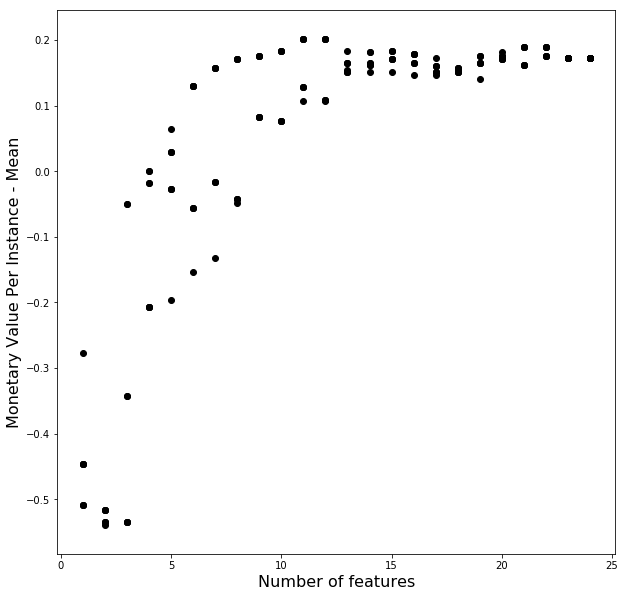

In [127]:
plt.rcParams['figure.figsize'] = (10,10)


sub_table = result_table[result_table["Model"] == "AdaBoostClassifier"]

sub_table['color'] = sub_table['Data Preparation'].apply(lambda x: colordict[x])



plt.scatter(sub_table["Feature Count"],
            sub_table["Monetary Value Per Instance - Mean"],
             c = 'black'),


plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Monetary Value Per Instance - Mean', fontsize=16)

#ggplot(aes(x='Feature Count', y='Monetary Value Per Instance - Mean', color='Data Preparation'), data=sub_table)  + geom_point()

Text(0, 0.5, 'Monetary Value Per Instance - Mean')

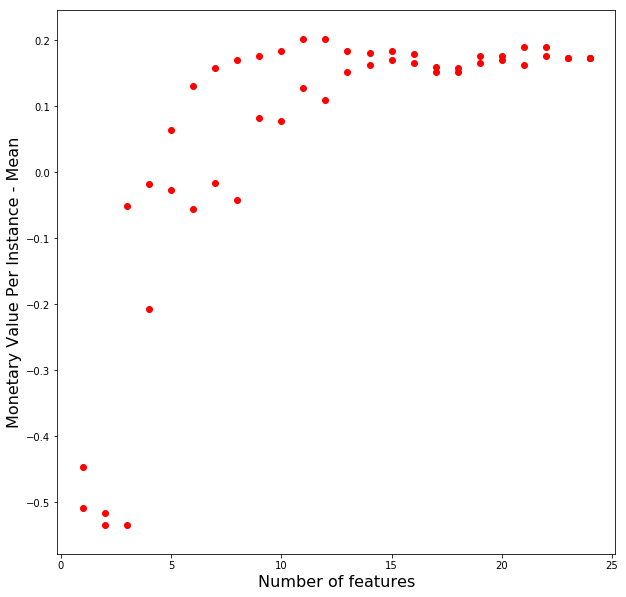

In [128]:
plt.scatter(sub_table["Feature Count"][sub_table['Data Preparation'] == 'No Scaling'],
            sub_table["Monetary Value Per Instance - Mean"][sub_table['Data Preparation'] == 'No Scaling'],
             c = 'red'),


plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Monetary Value Per Instance - Mean', fontsize=16)

In [129]:
best_model = result_table_aggregated.loc[result_table_aggregated["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
best_model_features = result_table_aggregated.loc[result_table_aggregated["Monetary Value Per Instance - Mean"].argmax()]["Features"]
best_parameters = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"]

print(best_model)
print(best_model_features)
print(best_parameters)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
['totalScanTimeInSeconds' 'lineItemVoids' 'scansWithoutRegistration'
 'scannedLineItems' 'scansWithoutRegistrationPerScannedLineItem'
 'quantityModificationsPerSecond' 'secondsPerEuro'
 'quantityModificationsPerEuro' 'pca_axis_2' 'tsne_axis_1' 'tsne_axis_2']
{'algorithm': 'SAMME.R', 'n_estimators': 50}


Evaluate the result of all folds

In [130]:
cv_results = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Cross Validation Results"]

cv_results

{'mean_fit_time': array([0.07719312, 0.24654045, 0.42067425, 0.56000149, 0.6918488 ,
        0.0813822 , 0.21253138, 0.39444449, 0.54145153, 0.61146438]),
 'std_fit_time': array([0.02842738, 0.02546927, 0.04019336, 0.10787258, 0.13792846,
        0.01621819, 0.0218753 , 0.09674357, 0.11914641, 0.10653174]),
 'mean_score_time': array([0.00299208, 0.00498657, 0.0159575 , 0.01466086, 0.01456122,
        0.00388956, 0.00777924, 0.01585753, 0.02074437, 0.02493329]),
 'std_score_time': array([3.02519263e-07, 6.30713329e-04, 1.21983838e-02, 6.43329631e-03,
        1.68059759e-03, 5.36989939e-04, 2.74211089e-03, 1.00572440e-02,
        6.17713624e-03, 1.10248599e-02]),
 'param_algorithm': masked_array(data=['SAMME', 'SAMME', 'SAMME', 'SAMME', 'SAMME', 'SAMME.R',
                    'SAMME.R', 'SAMME.R', 'SAMME.R', 'SAMME.R'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param

Performance of the model on the entire train data set (when trained on the entire train data set)

In [79]:
from sklearn.metrics import confusion_matrix

def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score
    
cm = confusion_matrix(Y , best_model.predict(X[best_model_features]))

monetary_value = get_monetary_value(cm)

True negative:  1775
False positive:  0
False negative:  0
True positive:  104
520 for 1879 instances in the test set
0.2767429483767962 per instance in the test set


# Predictions on the entire test data set

In [153]:
test

trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  valuePerSecond  lineItemVoidsPerPosition  scannedLineItems  pricePerScannedLineItem  scansWithoutRegistrationPerScannedLineItem  quantityModificationsPerScannedLineItem  lineItemVoidsPerSecond  scansWithoutRegistrationPerSecond  quantityModificationsPerSecond  secondsPerEuro  lineItemVoidsPerEuro  scansWithoutRegistrationPerEuro  quantityModificationsPerEuro  pca_axis_1  pca_axis_2  tsne_axis_1  tsne_axis_2
0                4                     467       88.48              4                         8                      4                   0.014989        0.189465                  0.571429               7.0                12.640000                                    1.142857                                 0.571429                0.008565                           0.017131                        0.008565        5.278029              0.045208                         0.090416                      0.045208    0.407059    0.107610     1.288056     0.439125
1                3                    1004       58.99              7                         6                      1                   0.026892        0.058755                  0.259259              27.0                 2.184815                                    0.222222                                 0.037037                0.006972                           0.005976                        0.000996       17.019834              0.118664                         0.101712                      0.016952   -0.404056   -0.107318    -2.048066    -0.496164
2                1                     162       14.00              4                         5                      4                   0.006173        0.086420                  4.000000               1.0                14.000000                                    5.000000                                 4.000000                0.024691                           0.030864                        0.024691       11.571429              0.285714                         0.357143                      0.285714    0.648069   -0.481068     3.447044     0.053117
3                5                     532       84.79              9                         3                      4                   0.026316        0.159380                  0.642857              14.0                 6.056429                                    0.214286                                 0.285714                0.016917                           0.005639                        0.007519        6.274325              0.106145                         0.035382                      0.047175    0.292492    0.294786     1.344228     1.554838
4                5                     890       42.16              4                         0                      0                   0.021348        0.047371                  0.210526              19.0                 2.218947                                    0.000000                                 0.000000                0.004494                           0.000000                        0.000000       21.110057              0.094877                         0.000000                      0.000000   -0.564485    0.295128    -2.414502     1.547169
5                5                    1072       12.67              3                         4                      1                   0.019590        0.011819                  0.142857              21.0                 0.603333                                    0.190476                                 0.047619                0.002799                           0.003731                        0.000933       84.609313              0.236780                         0.315706                      0.078927   -0.388592    0.294494    -1.828019     1.732591
6                3                     259       93.75              0                         7       

In [158]:
predictions = best_model.predict(test[best_model_features])

In [159]:
len(predictions)

498121

In [163]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ['fraud']
predictions_df

fraud
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
30          0
31          0
32          0
33          0
34          0
35          0
36          0
37          0
38          0
39          0
40          0
41          0
42          0
43          0
44          0
45          0
46          0
47          0
48          0
49          0
50          0
51          0
52          0
53          0
54          0
55          0
56          0
57          0
58          0
59          0
60          0
61          0
62          0
63          0
64          0
65          0
66          0
67          0
68          0
69          0
70          0
71          0
72          0
73          0
74          0
75          0
76          0
77          1
78          0
79          0
80          1
81          0
82          0
83          0
84          0
85          0
86          0
87          0
88          0
89          0
90          0
91          0
92          0
93          0
94          0
95          0
96          0
97          0
98          0
99          0
100         0
101         0
102         0
103         0
104         0
105         0
106         0
107         0
108         0
109         0
110         1
111         0
112         0
113         0
114         0
115         0
116         0
117         0
118         0
119         0
120         0
121         0
122         0
123         0
124         0
125         0
126         0
127         0
128         0
129         0
130         0
131         0
132         0
133         0
134         0
135         0
136         0
137         0
138         0
139         0
140         0
141         0
142         0
143         0
144         0
145         0
146         0
147         0
148         0
149         0
150         0
151         0
152         0
153         0
154         0
155         0
156         0
157         0
158         0
159         0
160         1
161         0
162         0
163         0
164         0
165         0
166         0
167         0
168         0
169         0
170         0
171         0
172         0
173         0
174         0
175         0
176         0
177         0
178         0
179         0
180         0
181         0
182         0
183         0
184         0
185         0
186         0
187         0
188         0
189         0
190         0
191         0
192         0
193         0
194         0
195         0
196         0
197         0
198         0
199         0
200         0
201         0
202         0
203         0
204         0
205         0
206         0
207         0
208         0
209         0
210         0
211         0
212         0
213         0
214         0
215         0
216         0
217         0
218         0
219         0
220         0
221         0
222         0
223         0
224         0
225         0
226         0
227         0
228         0
229         0
230         0
231         0
232         0
233         0
234         0
235         0
236         0
237         0
238         0
239         0
240         0
241         0
242         0
243         0
244         0
245         0
246         0
247         0
248         0
249         0
...       ...
497871      0
497872      0
497873      0
497874      0
497875      0
497876      0
497877      0
497878      0
497879      0
497880      0
497881      0
497882      0
497883      1
497884      0
497885      0
497886      0
497887      0
497888      0
497889      0
497890      0
497891      0
497892      0
497893      0
497894      0
497895      0
497896      0
497897      0
497898      0
497899      0
497900      0
497901      0
497902      1
497903      0
497904      0
4979

In [173]:
print(predictions_df.fraud.value_counts())
print(predictions_df.fraud.value_counts() / len(predictions_df))

0    475226
1     22895
Name: fraud, dtype: int64
0    0.954037
1    0.045963
Name: fraud, dtype: float64


In [176]:
predictions_df.to_csv('TU_Muenchen_2.csv', index = False)